In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import re
import pylab as pl
import matplotlib.pyplot as plt

In [2]:
fiscal_district = pd.read_csv('Sdf16_1a.txt', sep='\t', low_memory=False)

# Problem 1
For the districts you selected for budget cuts in HW 3 Problem 4, calculate and visualize the proportion of
each district’s total funding that will be lost.
Which districts will be affected by your budget cuts the most?


In [3]:
df = fiscal_district[fiscal_district['TFEDREV'] > -1]
df = df[df['TOTALEXP'] > -1]
df = df[df['TOTALREV'] > -1]

total_federal_revenue = df['TFEDREV'].sum()
cut = total_federal_revenue * 0.15

In [4]:
df['extra_amount'] = (df['TOTALREV'] - df['TOTALEXP'])
df= df[df['extra_amount'] > 0]
total_extra = df['extra_amount'].sum()
cut_percent = cut/total_extra
df['cut_amount'] = round(cut_percent * df['extra_amount'], 2)
df['cut_proportion'] = df['cut_amount'] / df['TOTALREV']
df = df.sort_values('cut_proportion', ascending= False)

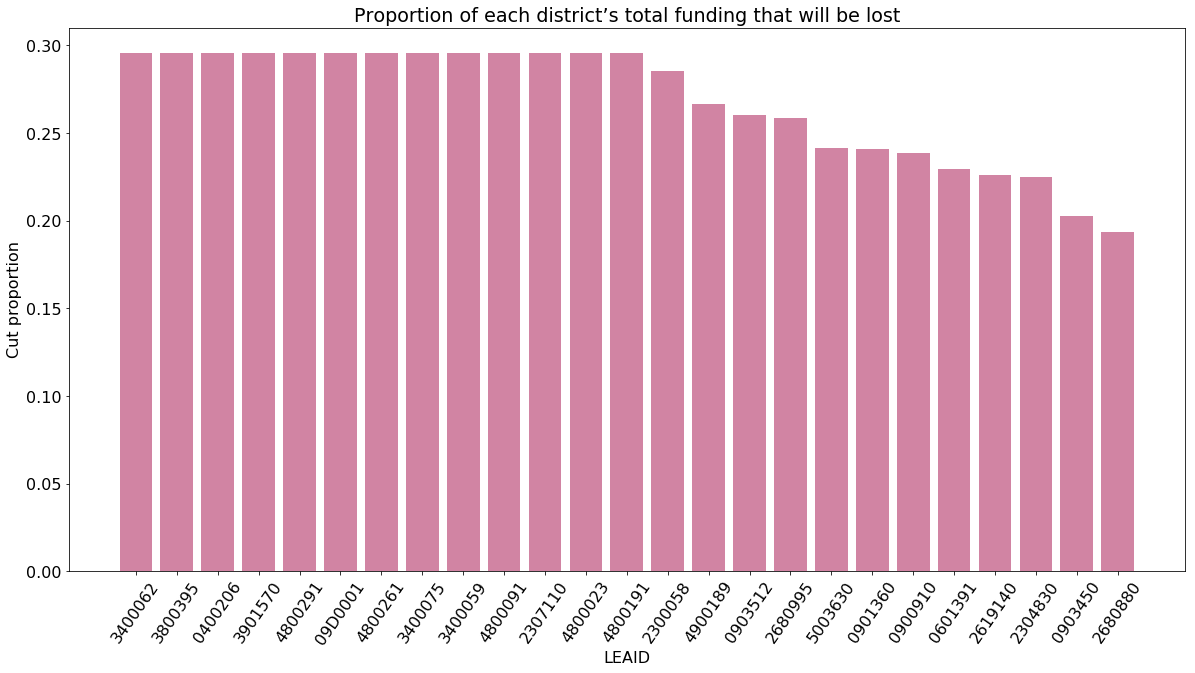

In [5]:
# visualize the proportion of each district’s total funding that will be lost
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df['LEAID'][:25], df['cut_proportion'][:25], align='center', color=(0.7, 0.2, 0.4, 0.6))

plt.xlabel('LEAID')
plt.ylabel('Cut proportion')
plt.title('Proportion of each district’s total funding that will be lost')
plt.xticks(rotation=55)
plt.show()

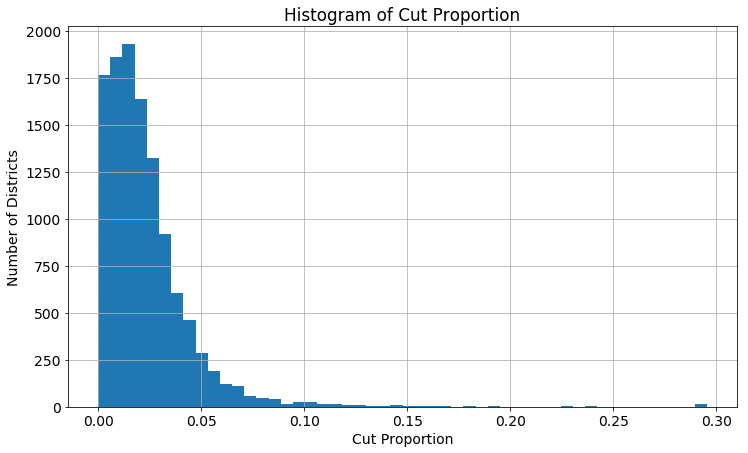

In [6]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(12, 7))
n, bins, patches = plt.hist(df['cut_proportion'], 50)
plt.xlabel('Cut Proportion')
plt.ylabel('Number of Districts')
plt.title('Histogram of Cut Proportion')
plt.grid(True)
plt.show()

Which districts will be affected by your budget cuts the most?
The districts that are affected by my budget cuts the most are LEAID 3400062, 3800395, 0400206, 3901570 and 4800291.

# Problem 2
A common problem with purely data-driven solutions is that they can inadvertently perpetuate hidden
pre-existing biases in the data, and further disadvantage groups that are already disadvantaged.
Calculate the proportion of enrolled students by race for each district, then visualize the distributions of
these for districts that received budget cuts versus districts that did not receive budget cuts.
Comment on whether the the distributions appear to be the same or different. Did your selection include any
hidden biases, or manage to avoid them?


In [7]:
membership = pd.read_csv('ccd_lea_052_1516_w_1a_011717.csv', low_memory=False)
membership = membership[['LEAID','LEA_NAME', 'TOTAL','AM','AS','BL','HI','HP','TR','WH']]
membership = membership[membership['TOTAL'] > -1]

In [8]:
membership['LEAID'] = membership['LEAID'].astype(str) 

In [9]:
df = fiscal_district[fiscal_district['TFEDREV'] > -1]
df = df[df['TOTALEXP'] > -1]
df = df[df['TOTALREV'] > -1]

df['LEAID'] = df['LEAID'].astype(str) 

df['extra_amount'] = (df['TOTALREV'] - df['TOTALEXP'])
df['federal_cut'] = df['extra_amount'] > 0
cut_amount_df = df[['LEAID', 'extra_amount', 'TOTALREV', 'TOTALEXP', 'federal_cut']]

In [10]:
cut_membership = pd.merge(cut_amount_df, membership, on='LEAID')

In [11]:
# Calculate the proportion of enrolled students by race for each district
cut_membership['AM_P'] = cut_membership['AM'] / cut_membership['TOTAL']  
cut_membership['AS_P'] = cut_membership['AS'] / cut_membership['TOTAL']  
cut_membership['HI_P'] = cut_membership['HI'] / cut_membership['TOTAL']  
cut_membership['HP_P'] = cut_membership['HP'] / cut_membership['TOTAL']  
cut_membership['BL_P'] = cut_membership['BL'] / cut_membership['TOTAL']  
cut_membership['WH_P'] = cut_membership['WH'] / cut_membership['TOTAL']  
cut_membership['TR_P'] = cut_membership['TR'] / cut_membership['TOTAL']  

[Text(0,0.5,'Proportion'),
 Text(0.5,0,'Cut to federal funding'),
 Text(0.5,1,'Distributions of enrolled white students w.r.t budget cut')]

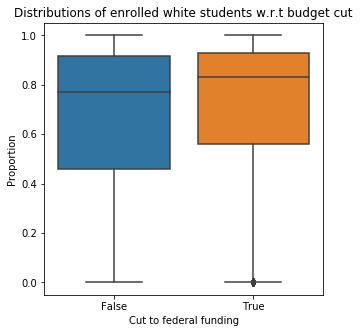

In [12]:
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x="federal_cut", y="WH_P", data=cut_membership).set(
    xlabel='Cut to federal funding', 
    ylabel='Proportion',
    title= 'Distributions of enrolled white students w.r.t budget cut'
)

[Text(0,0.5,'Proportion'),
 Text(0.5,0,'Cut to federal funding'),
 Text(0.5,1,'Distributions of enrolled American Indian/ Alaskian Native students w.r.t budget cut')]

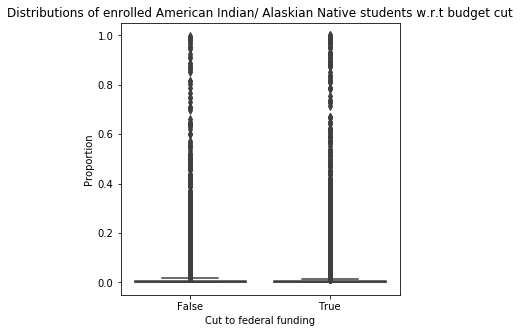

In [13]:
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x="federal_cut", y="AM_P", data=cut_membership).set(
    xlabel='Cut to federal funding', 
    ylabel='Proportion',
    title= 'Distributions of enrolled American Indian/ Alaskian Native students w.r.t budget cut'
)

[Text(0,0.5,'Proportion'),
 Text(0.5,0,'Cut to federal funding'),
 Text(0.5,1,'Distributions of enrolled Asian students w.r.t budget cut')]

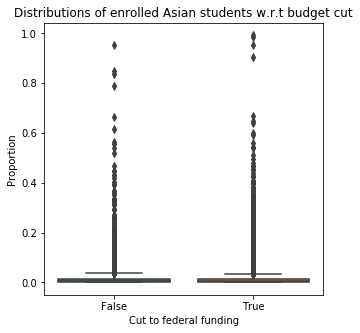

In [14]:
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x="federal_cut", y="AS_P", data=cut_membership).set(
    xlabel='Cut to federal funding', 
    ylabel='Proportion',
    title= 'Distributions of enrolled Asian students w.r.t budget cut'
)

[Text(0,0.5,'Proportion'),
 Text(0.5,0,'Cut to federal funding'),
 Text(0.5,1,'Distributions of enrolled Black students w.r.t budget cut')]

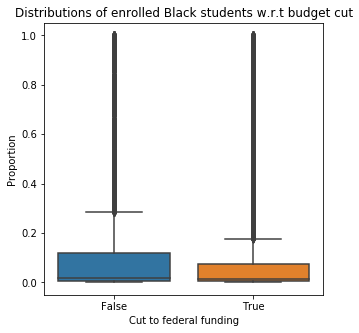

In [15]:
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x="federal_cut", y="BL_P", data=cut_membership).set(
    xlabel='Cut to federal funding', 
    ylabel='Proportion',
    title= 'Distributions of enrolled Black students w.r.t budget cut'
)

[Text(0,0.5,'Proportion'),
 Text(0.5,0,'Cut to federal funding'),
 Text(0.5,1,'Distributions of enrolled Hispanic students w.r.t budget cut')]

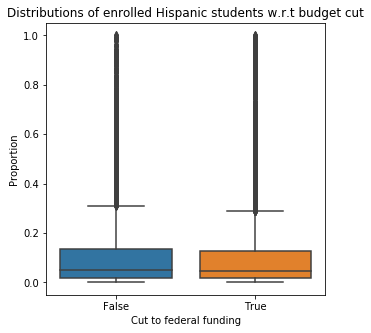

In [16]:
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x="federal_cut", y="HI_P", data=cut_membership).set(
    xlabel='Cut to federal funding', 
    ylabel='Proportion',
    title= 'Distributions of enrolled Hispanic students w.r.t budget cut'
)

[Text(0,0.5,'Proportion'),
 Text(0.5,0,'Cut to federal funding'),
 Text(0.5,1,'Distributions of enrolled Hawaiian native/ Pacific islander students w.r.t budget cut')]

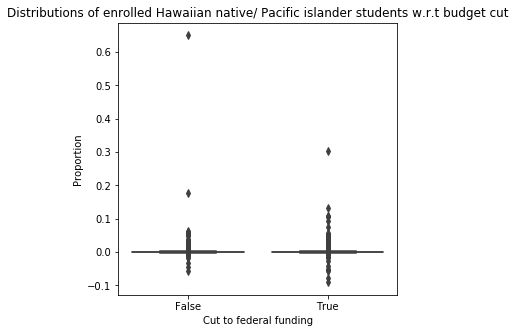

In [17]:
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x="federal_cut", y="HP_P", data=cut_membership).set(
    xlabel='Cut to federal funding', 
    ylabel='Proportion',
    title= 'Distributions of enrolled Hawaiian native/ Pacific islander students w.r.t budget cut'
)

[Text(0,0.5,'Proportion'),
 Text(0.5,0,'Cut to federal funding'),
 Text(0.5,1,'Distributions of enrolled two or more race students w.r.t budget cut')]

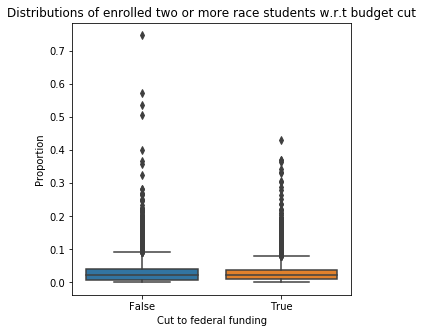

In [18]:
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x="federal_cut", y="TR_P", data=cut_membership).set(
    xlabel='Cut to federal funding', 
    ylabel='Proportion',
    title= 'Distributions of enrolled two or more race students w.r.t budget cut'
)

From the above plots, it can be seen that there is no visible difference between the plot for the schools that received a federal budget cut verse the schools that didn't receive a federal budget cut for each race. Due to which I feel that my approach didn't have any hidden bias as there is visually no huge difference seen from the boxplots. To analyse further whether there is a satistically signifcant difference additional tests needs to be performed.

# Problem 3
Calculate the proportion of enrolled students by disability status (students with an IEP under IDEA) for each
district, then visualize the distributions of these proportions for districts that received budget cuts versus
districts that did not receive budget cuts.
Comment on whether the the distributions appear to be the same or different. Did your selection include any
hidden biases, or manage to avoid them?


In [19]:
disability = pd.read_csv('ccd_lea_002089_1516_w_1a_011717.csv')
disability['LEAID'] = disability['LEAID'].astype(str) 
disability = disability[disability['SPECED'] > -1]

In [20]:
cut_disability = pd.merge(cut_membership, disability, on='LEAID')

In [21]:
# Calculate the proportion of enrolled students by disability status (students with an IEP under IDEA) for each district
cut_disability['disability_p'] = cut_disability['SPECED'] / cut_disability['TOTAL']  
cut_disability= cut_disability[cut_disability['disability_p'] <= 1]

[Text(0,0.5,'Proportion'),
 Text(0.5,0,'Cut to federal funding'),
 Text(0.5,1,'Distributions of enrolled disabled students w.r.t budget cut')]

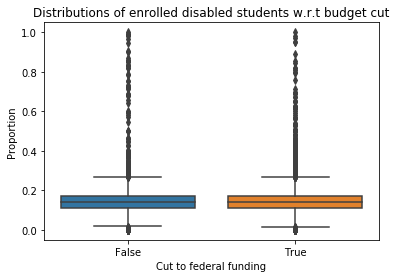

In [22]:
sns.boxplot(x="federal_cut", y="disability_p", data=cut_disability).set(
    xlabel='Cut to federal funding', 
    ylabel='Proportion',
    title= 'Distributions of enrolled disabled students w.r.t budget cut'
)

From the above plot, it can be seen that there is no visible difference between the plot for the schools that received a federal budget cut verse the schools that didn't receive a federal budget cut. Due to which I feel that my approach didn't have any hidden bias as there is visually no huge difference. To check whether there is a satistically signifcant difference further tests needs to be performed.

# Problem 4
Choose and critique one of your fellow classmates’ selection of schools for budget cuts in HW 3 Problem 4
and Problem 5. What was the justification of their selection? Discuss any advantages or disadvantages of
their approach.



I choose to critique the selection of schools for budget cuts by Parth Tandel. The justification of their approach is that it is only cutting the funding of the districts that have some amount saved (total expense - total funding). He then takes a very unique decision of taking the minimum of the saved amount and the total federal funding. So as to not cut the funding amount from other sources. Then he takes an equal percentage of this amount from every district with some saved amount.

The advantage of the approach is that it is fair for all the districts, as it is not cutting the funding of the districts with no saved amount, that are already in debt. Also, it is fair as it is only considering the minimum of the federal funding and the total saved amount. So he is not cutting an amount more than the federal funding for each district. 

The disadvantage of the method is that it is only cutting the funding where there is a saved amount which is fair but it is possible that the schools that are efficient in utlizing their budget are the ones that are getting a budget cut.

# Problem 5
Summarize and comment on what you learned from one the special topics lectures (MapReduce + Hadoop,
Visualization, Causal Inference, or the Industry Panel) of your choice.

The special topic lecture that I choose to summarize is MapReduce by Jan Vitek. 

The motivation of using mapreduce for large scale parallel data processing was the main topic of the lecture. The programming model of mapreduce is key-value pair for input and output. It has 2 functions map and reduce. Map function processes the key-value pair to intermediate pairs. The reduce function combines all the intermdiate values for a each key and produces the combined output values. Various application of mapreduce in the industry were discussed. He also explained Hadoop which is a distributed framework of big data. The hadoop framework and tools and architecture with mapreduce engine were decribed. 

This lecture was great to understand the basics of mapreduce and the motivation to learn it further.